<div dir="rtl" lang="he" xml:lang="he">

המחברת הזו היא תרגום של המחברת 
[הזו](https://colab.research.google.com/drive/1aWNdmYt7RcHMbUk-Xz2Cv5-cGFSWPXe0#scrollTo=WIanlOJ_67pf)
# מטרה

* להבין איך עובד תהליך ה
_backpropagation_ 
ב
_pytorch_



<div dir="rtl" lang="he" xml:lang="he">

# הכנות

In [1]:

!pip install torchviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=d8b5cfad497f08252cec25af5130413185e6646107b095562908ab6cb01e0070
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


<div dir="rtl" lang="he" xml:lang="he">

# הדגמה פשוטה על ריגריסה ליניארית

<div dir="rtl" lang="he" xml:lang="he">

אנו מעוניינים למצוא את הוקטור 
$x$ 
שפותר את המשוואה
$Ax+b = t$
במקרה שלנו הפתרון יהיה 
$x=()

??
We want to learn A and B such that t = Ax + B, (solution for our data is A = 2, B = 3)

In [2]:
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])

<div dir="rtl" lang="he" xml:lang="he">

נשים ערכים אקראים כל שהם ב
$x$  
וב
$y$  
כמובן שערכים אלו לא יתנו לנו טובה, אותם נוכל לשפר בתהליך האימון עד שנמצא ערכים נכונים

In [3]:
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

<div dir="rtl" lang="he" xml:lang="he">

נבנה את המודל שלנו

In [4]:
def model(x):
    scaled = A * x
    return scaled + B

<div dir="rtl" lang="he" xml:lang="he">

נגדיר פונקציית שגיאה
_loss function_
כך נעריך כמה מה שהמודל שלנו חזה רחוק מהתשובה הנכונה. 
זהו מודל שגיאה ריבועי והוא מחזיר את ריבוע ההפרש 

In [5]:
def loss_fn(y, t):
    diff = y - t
    sqdiff = diff ** 2
    return sqdiff.sum()

<div dir="rtl" lang="he" xml:lang="he">

נבנה פונקציית אופטימיזציה - כלומר פונקציה שמעדכנת את 
$A$ 
ו
$b$ 
כך שהתוצאה תהיה קמה שיותר קרובה. 
נחשב את הגרדיאנט של 
$A$ 
ו
$b$ 
ונעדכן את הערכים שלהם בתהליך הגרדיאנט דסנט

ניתן לשים לב שאנחנו מניחים שהמאפיין
 ```.grad```
מעודכן לכל טנסור בערכים הנכונים לו

In [6]:
def sgd_step(lr=0.1):
    global A
    global B
    with torch.no_grad(): 
        A -= A.grad * lr 
        A.grad.zero_()
        B -= B.grad * lr
        B.grad.zero_()

<div dir="rtl" lang="he" xml:lang="he">


כעת ניתן לאמן את המודל שלנו!!
תכלו להריץ את הקוד מספר פעמים ולראות כיצד אנחנו מקבלים את הערכים הנכונים

In [7]:
for i in range(1000):
    y = model(x)
    loss = loss_fn(y, t)
    loss.backward()
    sgd_step()
    if i % 100 == 0:
      print("loss: {}, A: {}, B: {}".format(loss, A.item(), B.item()))

loss: 25.0, A: 0.7999999523162842, B: 3.5999999046325684
loss: 0.0005399102228693664, A: 1.9689515829086304, B: 3.0502371788024902
loss: 1.445937641619821e-06, A: 1.9983934164047241, B: 3.0025997161865234
loss: 3.852846930385567e-09, A: 1.9999167919158936, B: 3.0001344680786133
loss: 1.0231815394945443e-11, A: 1.9999959468841553, B: 3.0000064373016357
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949


<div dir="rtl" lang="he" xml:lang="he">

# חישוב הגרדיאנט בצורה ידנית
גרדינאט דסנט הוא תהליך שמצמצם את ההפרש בן ערך הפונקציה בנקודה מסויימת לבן ערך המטרה - הערך אותו אנחנו רוצים לקבל, בתהליך אנחנו משנים הפרמטרים של הפונקציה (
  $A$ 
  ו
  $b$ 
  במקרה שלנו)
  ביחס לשיעור השגיאה 

אנחנו יודעים כמה לשנות בפרמטרים של הפונקציה ע"י חישוב הגרדיאנט שהיא פונקציית הנגזרת החלקית. 
במקרה שלנו נרצה לחשב 
$\frac{\partial loss}{\partial A}, \frac{\partial loss}{\partial B}$.

<div dir="rtl" lang="he" xml:lang="he">

בשביל לחשב את הנגזרת החלקית עלינו להתשמש בכלל השרשרת, החל מערך ההפסד עד 

$ \frac{\partial loss}{\partial A} = \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial A}$ (applied chain rule once)

$= \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial diff_i} * \frac{\partial diff_i}{\partial A}$

$= \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial diff_i} * \frac{\partial diff_i}{\partial y_i} * \frac{\partial y_i}{\partial scaled_i} * \frac{\partial scaled_i}{\partial A}$ (keep applying chain rule)

<div dir="rtl" lang="he" xml:lang="he">

Now, we (the authors of the model code) know the derivatives formulas for some of these, by reading the code. Shortening the above model code into the following, we can replace some of the partial derivatives above:

In [ ]:
# As a reminder, here's what our code looked like
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

# Forward
scaled = A * x
y= scaled + B
diff = y - t
sqdiff =  diff ** 2
loss = sqdiff.sum()

<div dir="rtl" lang="he" xml:lang="he">

Things we know:
$$ \frac{\partial loss}{\partial sqdiff_i} = 1$$

$$ \frac{\partial sqdiff_i}{\partial diff_i} = 2 * diff_i$$

$$ \frac{\partial diff_i}{\partial y_i} = 1 $$

$$ \frac{\partial y_i}{\partial scaled_i} = 1 $$

$$ \frac{\partial scaled_i}{\partial A} = x_i $$

Plugging everything back in, we get:

$$ \frac{\partial loss}{\partial A} = \sum_i 2 * diff_i * x_i$$

Let's verify our math really quickly:

In [ ]:
# backward
grad_A = (diff * 2 * x).sum()
expected, = torch.autograd.grad(loss, A, retain_graph=True)
assert torch.allclose(grad_A, expected)

Awesome, everything works out! **As an exercise, the numeric computation of grad_B is left to the reader.**
After deriving for B, we get the following:


In [ ]:
# backward
diff_2 = diff * 2
grad_A = (diff_2 * x).sum()
grad_B = diff_2.sum()
expected = torch.autograd.grad(loss, [A, B], retain_graph=True)
assert torch.allclose(grad_A, expected[0])
assert torch.allclose(grad_B, expected[1])

# Here’s how PyTorch’s autograd does it

During the forward pass, autograd builds up a computation graph eagerly. This computation graph is represented with Nodes and Edges. 

* Whenever an operation is called on a tensor that requires grad (e.g., mul), PyTorch creates a Node in the computation graph
* A Node can store a reference to Tensors and other things that it needs for backward computation (we’ll see an example of this later)
* When it comes time to compute gradients, we pass some values through the created autograd graph.
* Each node defines a backward formula.

Here’s a concrete example, using the above code.


In [8]:
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

# Forward
scaled = A * x
y= scaled + B
diff = y - t
sqdiff =  diff ** 2
loss = sqdiff.sum()

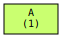

In [10]:
import torchviz

# Please run this in PyTorch >= 1.9
torchviz.make_dot(A, params={'A': A, 'B': B},show_attrs=True)

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
> scaled = A * x
  y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

Note that MulBackward0 saves the tensor `x` as the "other" tensor.




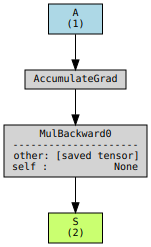

In [15]:
torchviz.make_dot(scaled, params={'A': A, 'S':scaled , 'X':x},show_attrs=True)

What is this AccumulateGrad Node?

Every leaf Tensor that requires gradient gets an AccumulateGrad Node associated with it. That Node is used to link back to the Tensor and know on which Tensor the gradients should be accumulated.
Note that the AccumulateGrad Nodes are the *only* Nodes that do not have parents pointing to them.

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
> y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

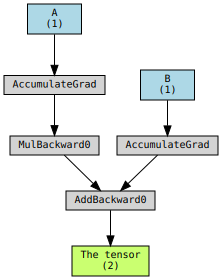

In [19]:
torchviz.make_dot(y, params={'A': A, 'B': B,'s':scaled,'The tensor':y})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
> diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

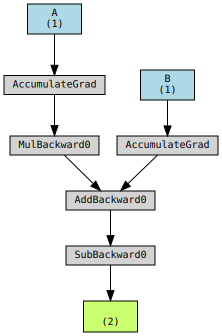

In [ ]:
torchviz.make_dot(diff, params={'A': A, 'B': B})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
  diff = y - t
> sqdiff = diff ** 2
  loss = sqdiff.sum()
```
Note that `self` being saved by PowBackward is `diff`

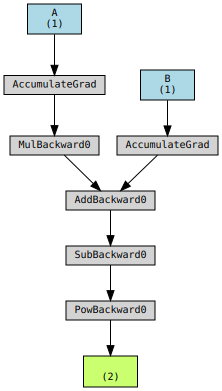

In [ ]:
torchviz.make_dot(sqdiff, params={'A': A, 'B': B})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
> loss = sqdiff.sum()
```

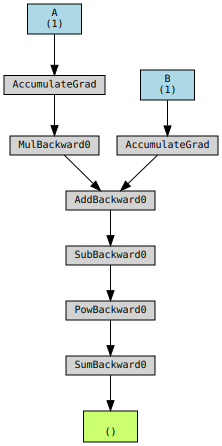

In [ ]:
torchviz.make_dot(loss, params={'A': A, 'B': B, 'x': x, 'diff': diff})

`loss.backward()` invokes a series of operations on this graph. In Pseudocode:
```
grad_sqdiff = SumBackward(sqdiff.shape).apply(1.)
grad_diff = PowBackward(base: diff, power: 2).apply(grad_sqdiff)
grad_y = SubBackward().apply(grad_diff)
grad_scaled, grad_B = AddBackward().apply(grad_y)
grad_A = MulBackward(other: X).apply(grad_scaled)
```
`SumBackward(input_shape).apply(grad)` is `grad.expand(input_shape)`.

`PowBackward(base, power).apply(grad)` is `grad * power * base ** (power - 1)`. 

And so on...


In [ ]:
grad_sqdiff = torch.tensor(1.).expand(sqdiff.shape)
grad_diff = grad_sqdiff * 2 * diff
grad_y = grad_diff
grad_scaled, grad_B = grad_y, grad_y.sum()
grad_A = (grad_scaled * x).sum()

There are two things to discuss here:

* How exactly are the grad formula derived?
    * See below
* Where does the sum() come from?
    * Chain rule! Remember how we were summing over each i in the numeric walkthrough.



# So, how are these grad formulas derived?

TL;DR: Each backward formula captures one of the multiplications in the chain rule.

Let’s say we were doing `out = torch.pow(in, p)`, somewhere in our model and we output a scalar loss. Then:

$$\frac{\partial loss}{\partial in_j} = \sum_i \frac{\partial loss}{\partial out_i} * \frac{\partial out_i}{\partial in_j} $$

But wait! pow is a pointwise operation, so `out[i]` does not depend on `in[j]` unless `i == j`.

$$\frac{\partial loss}{\partial in_j} = \frac{\partial loss}{\partial out_j} * \frac{\partial out_j}{\partial in_j} $$

$$\frac{\partial loss}{\partial in_j} = \frac{\partial loss}{\partial out_j} * p * in_j^{p-1} $$

Writing this in a vectorized form we get `grad_input = grad_output * p * in ** (p-1)`.

You will see detailed examples on how to derive these formulas in the next section.

# What about these saved Tensors that might be needed for backward?

Autograd will automatically save all the required data to be able to compute the backward pass.

You can actually see these saved properties here:

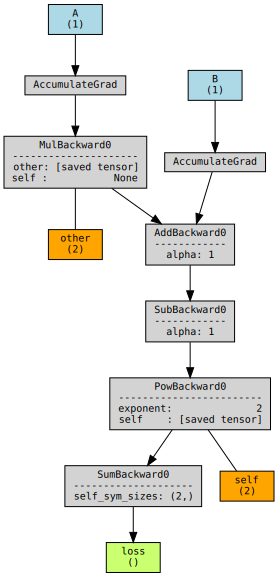

In [24]:
torchviz.make_dot(loss, params={'A': A, 'B': B, 'x': x, 'diff': diff,'loss':loss}, show_attrs=True, show_saved=True)